# Equação de Onda: resolução numérica e analítica

* PET- Física
* Petianos: Wallysson Pereira da Silva
* Data: 22/11/2024

O objetivo desse `Notebook` é fazer uma abordagem geral da **Equação de Onda**, explorando tanto uma de suas resoluções analíticas quanto uma resolução numérica. Tendo isso em vista, esse `Notebook` será divido nos seguintes tópicos:
1. Introdução da Equação de Onda
2. Resolução Analítica
3. Resolução Numérica

A primeira seção estará totalmente dedicada à apresentação da Equação de Onda, junto com uma rápida e superficial motivação sobre a mesma.

Já na segunda seção, apesar de estar indexada como Resolução Analítica, iremos, ao obter a solução analítica utilizando o devido método, usar ferramentais computacionais para ilustrar o comportamento da onda por meio de gráficos.

Por fim, na última parte desse `Notebook`, estaremos totalmente focados na resolução numérica da Equação de Onda, utilizando o Método Espectral. Aqui também será feita a devida ilustração através de gráficos.

### Pré-requisitos
Para o total entendimento desse `Notebook`, é interessante que o leitor tenha conhecimentos básicos de programação (sobretudo em python), junto de uma pequena noção sobre derivadas (totais e parciais) de funções. No entanto, como esse trabalho busca servir como uma base para quem está estudando a Equação de Onda, a abordagem aqui adotada buscará sempre ser bem elucidativa. Ainda, tanto na abordagem analítica quanto na numérica, conhecimentos prévios sobre Séries de Fourier e a Transformada Discreta de Fourier são necessários para o melhor entendimento dos métodos. 

### Importando as bibliotecas

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp, sin, cos, pi
from numpy.fft import rfft, irfft

### **Informações sobre as bibliotecas**

In [6]:
%load_ext version_information
%version_information Matplotlib, Numpy

Software versions
Python 3.11.9 64bit [MSC v.1938 64 bit (AMD64)]
IPython 8.29.0
OS Windows 10 10.0.22631 SP0
Matplotlib 3.9.2
Numpy 2.1.3
Tue Nov 26 20:48:53 2024 Hora Padrão de Buenos Aires

## 1. Introdução

$\quad$ O estudo da Equação de Onda é de suma importância para a física, justamente pelo seu caracter geral no contexto de uma descrição física de fenômenos oscilatórios, governando tanto a propagação de uma onda mecânica (uma onda numa corda, por exemplo), quanto de uma onda eletromagnética. A Equação de Onda  tem a seguinte forma: 

$$ \frac{\partial^2 u(x,t)}{\partial x^2}  - \frac{1}{v^2} \frac{\partial^2 u(x,t)}{\partial t^2} = 0    \tag{1.1}$$

Ou, equivalentemente: 

$$ \frac{\partial^2 u(x,t)}{\partial t^2} =  v^2 \frac{\partial^2 u(x,t)}{\partial x^2}$$

Percebemos que basicamente a Equação de Onda é uma EDP (Equação Diferencial Parcial), que relaciona as derivadas parciais (de segunda ordem) no tempo e no espaço de uma dada função $u(x,t)$.

Resolver a Equação de Onda significa resolver uma Equação Diferencial Parcial, que nesse caso, equivalentemente, significa encontrar a uma função $u(x,t)$ no qual suas derivadas parciais segundas se relacionem da maneira expressa acima. 

A $u(x,t)$ obtida nesse processo nos informará qual será a amplitude da oscilação na posição $x$ e no tempo $t$.

## 2. **Resolução Analítica - Método de Separação de Variáveis**

Começaremos com a resolução analítica da Equação de Onda, utilizando o **Método de Separação das Variáveis**. 

Para a resolução, iremos considerar o caso da **corda elástica com deslocamento inicial não-nulo**. Nele, teremos uma corda com as extremidades fixas em $x=0$ e $x = L$ (ou seja, o valor de $u(x,t)$ é sempre igual a $0$ nessas extremidades). A posição inicial de cada ponto dessa corda será fornecida por uma dada função $f(x)$. Tal função estará determinando a forma inicial da onda. 

### Ajeitar o TEXTO

$$u(0,t) = u(L,t) = 0 $$

Uma última consideração à ser feita, é que em $t=0$ todos os pontos da corda não tem velocidade vertical. Isso seria equivalente ao instante de tempo onde uma pedra lançada para cima alcança sua altura máxima. Em tal instante, a pedra tem um deslocamento vertical (medido pelo referencial da terra), está exposta à uma aceleração (a gravitacional), mas não tem velocidade.

### Ajeitar texto

$$u(x,0) = f(x) \ \text{ e } \ \frac{\partial u(x,0)}{\partial t} = 0 $$ 

Onde o termo $\frac{\partial u(x,0)}{\partial t}$ é tal como é para representar a variação na posição vertical (por isso a derivada é temporal, e não espacial), ou seja, sua velocidade vertical.

Como já discutido, o resultado da EDP apresentada é uma função $u(x,t)$, ou seja, uma função de duas variáveis independentes. No presente método, estaremos supondo que $u(x,t)$ pode ser escrita como a **multiplicação** de duas funções, uma dependendo só da variável $x$ e outra dependente apenas de $t$. Assim:

$$u(x,t) = X(x)\cdot T(t)$$

Com essa condição imposta, vamos agora basicamente só obter os termos $\frac{\partial^2 u(x,t)}{\partial x^2}$ e $\frac{\partial^2 u(x,t)}{\partial t^2}$ e substituir na Equação de Onda. Para o termo espacial:

$$\frac{\partial^2 u(x,t)}{\partial t^2} = \frac{\partial^2 [X(x)\cdot T(t)]}{\partial t^2}$$

Mas, considerando que estamos derivando em relação ao tempo, teremos que $X(x)$ pode ser tratado como uma constante. Daí segue:

$$\frac{\partial^2 u(x,t)}{\partial t^2} = X(x)\frac{\partial^2 T(t)}{\partial t^2}        $$

Contudo, como a função restante na derivada temporal só é função unica e exclusivamente da variável $t$, a derivada parcial se torna então uma derivada total:

$$\frac{\partial^2 u(x,t)}{\partial t^2} = X(x) \frac{d^2 T(t)}{dt^2} = X(x) T^{\prime\prime}(t)  $$

Com um raciocíno análogo, obtemos o termo equivalente para a termo espacial:

$$\frac{\partial^2 u(x,t)}{\partial x^2} = \frac{\partial^2 [X(x) \cdot T(t)]}{\partial x^2} = T(t) \frac{\partial^2 X(x)}{\partial x^2} = T(t) \frac{d^2 X(x)}{dx^2} = T(t) X^{\prime \prime}(x)$$

Vamos basicamente substituir as expressões obtidas na Equação de Onda, chegando em:

$$ \frac{\partial^2 u(x,t)}{\partial t^2} =  v^2 \frac{\partial^2 u(x,t)}{\partial x^2} \rightarrow X(x) T^{\prime\prime}(t) = v^2 T(t) X^{\prime \prime}(x)$$

Agora é conviente organizar essa igualdade da seguinte forma:

$$ \frac{X^{\prime\prime}(x)}{X(x)} = \frac{1}{v^2} \frac{T^{\prime\prime}(t)}{T(t)}     $$

Aqui cabe uma análise da expressão que obtemos: de um lado temos uma função só de $x$, do outro uma função só de $t$. Contudo, como as funções estão intimamente ligadas através de uma igualdade, daí tiramos diretamente que elas _obrigatoriamente_ terão que ser iguais a uma dada constante. Para essa conclusão, basta pensarmos, por exemplo, que estamos variando o $x$ da expressão à esquerda. Porém, nada nos obriga a estar variando o $t$ ao mesmo tempo que variamos $x$ (já que as variáveis são independentes). Assim, mesmo que a variável $x$ esteja assumindo diferentes valores (fato que poderia estar alterando todo o termo $\frac{X^{\prime\prime}(x)}{X(x)}$), o termo $\frac{X^{\prime\prime}(x)}{X(x)}$ não pode estar variando, justamente porque $\frac{1}{v^2} \frac{T^{\prime\prime}(t)}{T(t)}$ estará constante.

Chamando a constante de $\lambda$, obtemos a relação:

$$ \frac{X^{\prime\prime}(x)}{X(x)} = \frac{1}{v^2} \frac{T^{\prime\prime}(t)}{T(t)} = \lambda   $$

Iremos analisar o termo espacial e o termo temporal separadamente. 

- Para o termo espacial:

$$ \frac{X^{\prime\prime}(x)}{X(x)} = \lambda \rightarrow X^{\prime\prime}(x) = \lambda X(x)$$ 

Por fim, obtemos simplesmente a EDO (Equação Diferencial Ordinária):

$$ X^{\prime\prime}(x) - \lambda X(x) = 0 $$ 

Que pode ser resolvida obtendo a equação característica e determinando a solução geral:

$$ r^2 - \lambda = 0 \rightarrow r^2 = \lambda \rightarrow r = \pm \sqrt{\lambda}$$


Aqui temos 3 possíveis casos: $\lambda = 0$, $\lambda > 0$ e $\lambda <0$. Contudo, as soluções obtidas quando consideramos os dois primeiros casos entram em conflito com a condição inicial (elas não se anulam nas extremidades). Por isso, o terceiro caso prevalece e $\lambda$ será necessariamente uma constante negativa.  

Ademais, para facilitar os desenvolvimentos seguintes, explecitaremos o sinal negativo de $\lambda$:

$$ \frac{X^{\prime\prime}(x)}{X(x)} = \frac{1}{v^2} \frac{T^{\prime\prime}(t)}{T(t)} = -\lambda   $$

Agora $\lambda$ essencialmente se torna um valor positivo, já que explicitamos o sinal negativo na igualdade.

Repetindo a análise da equação característica para o termo espacial, obtemos:

$$r = \pm \sqrt{-\lambda} = \pm \sqrt{-1} \sqrt{\lambda} = \pm i\sqrt{\lambda} $$

A solução geral para uma raiz complexa $\alpha \pm \beta i$ é: 

$$ X(x) = e^{\alpha}(A\cos{\beta x} + B\sin{\beta x})$$

Então, no nosso caso onde $\alpha = 0$ e $\beta = \sqrt{\lambda}$:

$$ X(x) = A\cos{\sqrt{\lambda}x} + B\sin{\sqrt{\lambda} x}$$

Aqui tiramos um tempo para analisar a solução $X(x)$ obtida em relação às condições iniciais. Tendo em vista que $u(0,t) = X(0)\cdot T(t) = 0$, teremos que $X(0) = 0$ (para evitar a solução trivial onde $T(t) = 0$ para todo $t$). Então:

$$X(0) = A\cos{\sqrt{\lambda} 0} + B\sin{\sqrt{\lambda} 0} = A = 0$$

Daí tiramos que a solução espacial será apenas:

$$ X(x) = B\sin{\sqrt{\lambda} x} $$

Agora aplicando a outra condição inicial, onde $u(L,t) = X(L)\cdot T(t) = 0$, donde tiramos que $X(L) = 0$, novamente para evitar uma solução trivial onde $T(t) = 0$ para todo $t$. Assim:

$$ X(L) = B\sin{(\sqrt{\lambda}L)} = 0$$

Se a constante $B$ for igual a zero também, caímos na solução trivial para $X(x)$. Então teremos que o termo do seno será igual a zero:

$$ \sin{\sqrt{\lambda}L} = 0$$

Daqui tiramos uma limitação para o valor de $\lambda$, onde ele tem que ser tal que respeite: 

$$ \sqrt{\lambda} L = n\pi, \text{onde n} = 1,2,3,... $$

Ou seja: 

$$ \sqrt{\lambda}= \frac{n\pi}{L}$$

Por fim resultando numa solução para o termo espacial:

$$ X_n(x) = B_n\sin{(\frac{n\pi}{L}x)} $$

O infixo $n$ foi inserido para destacar que temos uma família de soluções aqui, onde cada $n$ determina uma solução particular diferente. 

- Para o termo temporal:

Nós já basicamente obtemos a EDO:

$$\frac{T^{\prime\prime}(t)}{T(t)} = -v^2\lambda \rightarrow T^{\prime\prime}(t)+v^2\lambda T(t) = 0$$

Donde tiramos a equação característica:

$$ r^2 + v^2\lambda = 0 \rightarrow r = \pm \sqrt{-v^2 \lambda} = \pm v\sqrt{-\lambda} = \pm iv\sqrt{\lambda}$$

De novo aplicando a solução geral $ X(t) = e^{\alpha}(A\cos{\beta t} + B\sin{\beta t})$ para uma raíz complexa, com $\alpha = 0$ e $\beta = v\lambda$ e com as constantes sendo denominadas de $K_1$ e $K_2$:

$$ T(t) = K_1\cos{(v \sqrt{\lambda} t)} + K_2\sin{(v \sqrt{\lambda} t)}$$

Mas, aplicando a condição inicial de que $\frac{\partial u(x,0)}{\partial t} = 0$:

$$\frac{\partial u(x,0)}{\partial t} = \frac{\partial [X(x)\cdot T(0)]}{\partial t} = X(x)\frac{d T(0)}{dt} = 0$$

Onde, novamente para evitar a solução trivial, teremos que:

$$ \frac{d T(0)}{dt} = 0$$

Aplicando essa condição à expressão $\frac{d T(t)}{dt} = \frac{d}{dt}(K_1\cos{(v \sqrt{\lambda} t)} + K_2\sin{(v \sqrt{\lambda} t)}) = -v\sqrt{\lambda}K_1\sin{(v \sqrt{\lambda} t)} + v\sqrt{\lambda}K_2\cos{(v \sqrt{\lambda} t)} $ obtida, teremos:

$$ \frac{d T(0)}{dt} = -v\sqrt{\lambda}K_1\sin{(v \sqrt{\lambda} 0)} + v\sqrt{\lambda}K_2\cos{(v \sqrt{\lambda} 0)} = 0 \rightarrow v\sqrt{\lambda}K_2 = 0 \rightarrow K_2 = 0$$

Assim, a solução fica:

$$ T(t) = K_1\cos{(v\sqrt{\lambda}t)}$$

Contudo, nos já encontramos um valor para $\sqrt{\lambda}$ no calculo anterior. Portante, substituindo-o aqui:

$$ T_n(t) = K_1\cos{(v\frac{n\pi}{L}t)}$$

Por fim, obtemos:

$$u_n(x,t) = B_n\sin{(\frac{n\pi}{L}x)} K_n\cos{(v\frac{n\pi}{L}t)}$$

Para cada $n$ na expressão teremos uma solução particular. Contudo, para satisfazer qualquer condição inicial que seja, teremos que considerar uma superposição dessas soluções fundamentais. Assim, assumimos a seguinte forma para $u(x,t)$:

$$ u(x,t) = \sum_{i=1}^{\infty} B_n\sin{(\frac{n\pi}{L}x)}K_n\cos{(v\frac{n\pi}{L}t)}$$

Como $B_n$ multiplicado com $K_n$ resulta numa outra constante, faremos a substituição:

$$ u(x,t) = \sum_{i=1}^{\infty} C_n\sin{(\frac{n\pi}{L}x)}\cos{(v\frac{n\pi}{L}t)}$$

Obtida essa solução, vamos aplicar a condição inicial $u(x,0) = f(x)$: 

$$ u(x,0) = \sum_{i=1}^{\infty} C_n\sin{(\frac{n\pi}{L}x)}\cos{(\frac{n\pi}{L}0)} = \sum_{i=1}^{\infty} C_n\sin{(\frac{n\pi}{L}x)} = f(x)$$

Onde a igualdade $f(x) = \sum_{i=1}^{\infty} C_n\sin{\frac{n\pi}{L}x}$ nos dá a informação de que os $C_n$ são os coeficientes de Fourier da função $f(x)$ expandida em senos.

Com isso já podemos partir para uma implementação dessa solução.

Usaremos a seguinte função $f(x)$ como condição inicial (tanto agora quanto na parte do método numérico): 

$$ f(x) = 
\begin{cases} 
    x, & \text{se } 0 \leq x < \frac{L}{2} \\
    L-x, & \text{se } \frac{L}{2} \leq x < L 
\end{cases}
$$

com $L = 1$. À primeira vista parece uma condição inicial estranha, mas ela basicamente nos retorna um triangulo, com o seu bico em $x = \frac{L}{2}$. Isso ficará mais visualmente apresentável logo mais.

Definida a função, já podemos obter os coeficientes $C_n$ (utilizados na solução).

Já considerando que $f(x)$ extendida de $x = -L$ até $x = L$ será uma função ímpar (já que queremos a sua expansão em senos), os coecificentes serão obtedos pela seguinte integral: 

$$ C_n = \frac{2}{L} \int_{0}^{L} f(x)\sin{(\frac{n\pi x}{L})} \, dx$$

Visto que desenvolvimento dos coeficientes $C_n$ é consideravalmente longo, ele estará apenas no apêndice. 

O resultado lá exibido é:

$$ C_n  = 
\begin{cases} 
    \frac{4}{n^2\pi^2} (-1)^{\frac{n-1}{2}}, & \text{se n for ímpar} \\
    0, & \text{se n for par}  
\end{cases}$$

Apenas fazendo a consideração de que $v = 4 m/s$, já temos tudo necessário para desenvolver o código de aplicação.

Relembrando a solução:

$$u(x,t) = \sum_{i=1}^{\infty} C_n\sin{(\frac{n\pi}{L}x)}\cos{(v\frac{n\pi}{L}t)}$$

In [3]:
def f(x, L):
    if x>=0 and x<(L/2):
        return x
    if x>=(L/2) and x<=L:
        return L-x

In [4]:
def C(n):
    if n%2 == 0:
        return 0
    else:
        return (4/(n**2*pi**2))*(-1)**((n-1)/2)

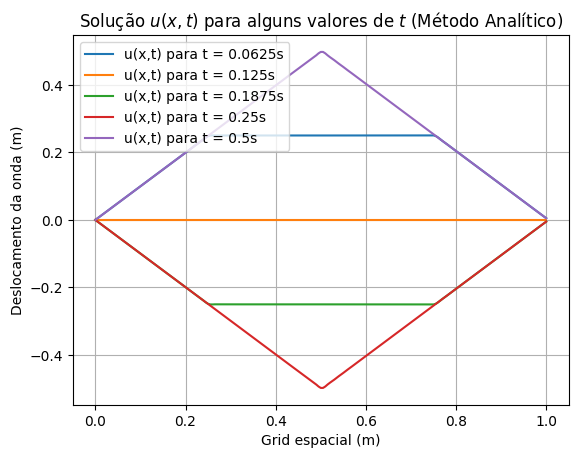

In [18]:
a = 0 # Extremidade à esquerda
L = 1 # Extremidade à direita 
N = 201 # Número de repartições do intervalo
v = 4 # Parametro (velocidade) da equação de onda
dx = (L-a)/N # Espaçamendo do grid espacial
xs = np.linspace(a,L,N) # Grid espacial
u_x_0 = np.zeros(N, float) 

Max = 100 # O valor máximo de coeficientes Cn que usaremos
Cn = np.zeros(Max, float)
for n in range(1,Max):
    Cn[n] = C(n)

tempos = [0.0625, 0.125, 0.1875, 0.25, 0.5] # Array com os instantes de tempo em que analisaremos a onda

u_x_t_fourier = [] # Lista para salvar a solução u(x,t) em cada t usando o método analítico

for t in tempos:
    u_x_t = np.zeros(N, float) # Cria um array vazio equivalente à grade espacial
    for i in range(N): # Percorre todo o grid espacial no dado tempo t iniciado no for anterior, com passos de dx
        aux = 0
        for n in range(Max): # Para cada ponto do grid espacial, terá esse somatório que convirgirá para o valor da função naquele dado ponto
            aux+= Cn[n]*sin(n*pi*(i*dx)/L)*cos(v*n*pi*t/L)
        u_x_t[i] = aux
        
    u_x_t_fourier.append(u_x_t) # Adiciona a solução u(x,t) no dado tempo t à lista anteriormente criada
    
    plt.plot(xs,u_x_t, label = f'u(x,t) para t = {t}s') # Plota a solução u(x,t) no tempo em questão.
    

u_x_t_fourier = np.array(u_x_t_fourier) # Apenas para transformar a lista num array



plt.xlabel("Grid espacial (m)")
plt.ylabel("Deslocamento da onda (m)")
plt.title("Solução $u(x,t)$ para alguns valores de $t$ (Método Analítico)")
plt.grid()
plt.legend()
plt.show()

Onde o valor da função em $t = 0.5s$ equivale à condição inicial, ou seja, já foi percorrido uma oscilação completa.

Um fato interessante para se notar é que, apesar da corda só estar definida para $x$ entre $0 \ m$ e $L = 1.0 \ m$, a solução, por ser baseada no ferramental de Fourier, acaba sendo definida em todo o intervalo real, sobre a forma de uma função ímpar com período igual a $2L$. Tiraremos um pequenos vislumbre dessa propriedade da solução, plotando a solução no intervalo $[-3,3]$:

C:\Users\noky2\AppData\Local\Temp\ipykernel_2620\911012143.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


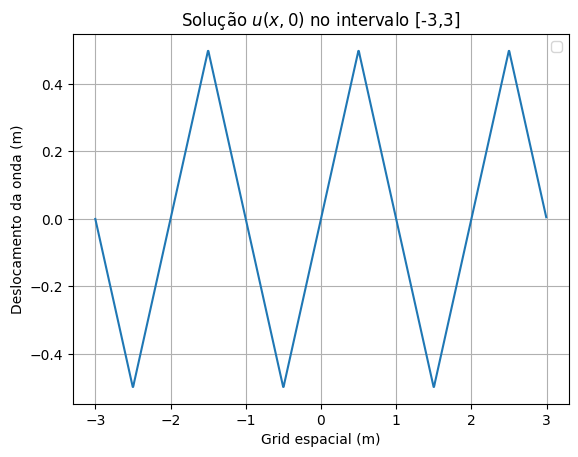

In [17]:
# Para t = 0
xs3 = np.arange(-3,3,dx)
u_x_t = np.zeros(len(xs3), float)

for i in range(len(xs3)):
    aux = 0
    for n in range(Max):
        aux+= Cn[n]*sin(n*pi*(xs3[i])/L)*cos(v*n*pi*0/L)
    u_x_t[i] = aux
        



plt.plot(xs3,u_x_t)
plt.xlabel("Grid espacial (m)")
plt.ylabel("Deslocamento da onda (m)")
plt.title("Solução $u(x,0)$ no intervalo [-3,3]")
plt.grid()
plt.legend()
plt.show()


## 3. Resolução Numérica

Para o desenvovimento do método numérico, primeiro consideremos a seguinte solução trivial para a Equação de Onda:

$$ u_k(x,t) = \sin{(\frac{\pi kx}{L})}e^{i\omega t}$$

É fácil verificar que essa equação safisfaz as condições de contorno (ser zero em $x=0$ e $x=L$). Também é natural o desenvolvimento para confirmar que a expressão respeita a Equação de Onda, desde que:

$$ \omega = \frac{\pi vk}{L}$$

Agora discretizando o domínio espacial, dividindo a corda em $N$ intervalores iguais, com $N+1$ pontos. A expressão para o enésimo ponto do grid será:

$$ x_n = \frac{n}{N}L$$

A solução, a amplitude de oscilação, da onda nesse ponto será:

$$u_k(x_n,t) = \sin{(\frac{\pi k}{L}x_n)}exp{(i\frac{\pi vkt}{L})}$$

$$u_k(x_n,t) = \sin{(\frac{\pi k}{L}\frac{nL}{N})}exp{(i\frac{\pi vkt}{L})}$$

$$u_k(x_n,t) = \sin{(\frac{\pi k n}{N})}exp{(i\frac{\pi vkt}{L})}$$

A solução aqui exposta não é apta a satisfazer qualquer condição inicial. Para resolver isso, proponho considerarmos uma superposição dessas expressões, assim permitindo a determinação de condições iniciais mais gerais. Vale lembrar que só podemos realizar esse passo porque a Equação de Onda é linear. Assim:

$$ u(x_n,t) = \frac{1}{N}\sum_{k=1}^{N-1} b_k \sin{(\frac{\pi k n}{N})}exp{(i\frac{\pi vkt}{L})}$$

onde $b_k$ são coeficientes qualquer e o termo $\frac{1}{N}$ foi adicionado para possibilitar futuras comparações.

Como $b_k$ pode ser um número complexo, podemos considerar a seguinte forma para ele: 

$$ b_k = \alpha_k + i\eta_k $$

Assim:

$$ u(x_n,t) = \frac{1}{N}\sum_{k=1}^{N-1} ( \alpha_k + i\eta_k) \sin{(\frac{\pi k n}{N})}exp{(i\frac{\pi vkt}{L})}$$

Analisando agora na condição inicial $u(x,0)$ (ou seja, em $t=0$):

$$ u(x_n,0) = \frac{1}{N}\sum_{k=1}^{N-1} ( \alpha_k + i\eta_k) \sin{(\frac{\pi k n}{N})}exp{(i\frac{\pi vk0}{L})} = \frac{1}{N}\sum_{k=1}^{N-1} ( \alpha_k + i\eta_k) \sin{(\frac{\pi k n}{N})}$$

Contudo, considerando a própria natureza física de $u(x,0)$, teremos que o lado esquerdo da equação sempre será um valor real, justamente porque um deslocamento sempre o é. Assim, para a igualdade ser verdadeira, $b_k$ será composto apenas pelos reais $\alpha_k$. Resultando em:

$$ u(x_n,0) = \frac{1}{N}\sum_{k=1}^{N-1} \alpha_k \sin{(\frac{\pi k n}{N})}$$

Onde obtemos simplesmente uma Transformada Discreta de Fourier em senos com coeficientes $\alpha_k$.

De forma similar, podemos fazer essa análise com a outra condição inicial $\frac{\partial u(x_n,0)}{\partial t}$:

Primeiro obtendo $\frac{\partial u(x_n,t)}{\partial t}$:

$$ \frac{\partial u(x_n,t)}{\partial t} = \frac{\partial [\frac{1}{N}\sum_{k=1}^{N-1} ( \alpha_k + i\eta_k) \sin{(\frac{\pi k n}{N})}exp{(i\frac{\pi vkt}{L})}]}{\partial t} = \frac{1}{N} \sum_{k=1}^{N-1} ( \alpha_k + i\eta_k) \sin{(\frac{\pi k n}{N})} \frac{\partial [exp{(i\frac{\pi vkt}{L})}]}{\partial t} $$

$$ \frac{\partial u(x_n,t)}{\partial t} = \frac{1}{N} \sum_{k=1}^{N-1}( \alpha_k + i\eta_k) \sin{(\frac{\pi k n}{N})} \exp{(\frac{i\pi v k t}{L})} \frac{i\pi vk}{L}$$

$$ \frac{\partial u(x_n,t)}{\partial t} = \frac{1}{N}  \sum_{k=1}^{N-1} \frac{\pi v k}{L} (i\alpha_k -\eta_k) \sin{(\frac{\pi k n}{N})} \exp{(\frac{i\pi v k t}{L})} $$

onde o $i$ foi distribuído dentro dos parênteses. Agora vamos considerar o instante com $t=0$:

$$ \frac{\partial u(x_n,0)}{\partial t} = \frac{1}{N}  \sum_{k=1}^{N-1} \frac{\pi vk}{L} (i\alpha_k -\eta_k) \sin{(\frac{\pi k n}{N})}$$

De novo podemos usar o argumento de que o termo à esquerda da expressão é sempre real, obetendo:

$$ \frac{\partial u(x_n,0)}{\partial t} = \frac{1}{N}  \sum_{k=1}^{N-1} \frac{\pi v k}{L} (-\eta_k) \sin{(\frac{\pi k n}{N})}$$

$$ \frac{\partial u(x_n,0)}{\partial t} = \frac{1}{N}  \sum_{k=1}^{N-1} (-\frac{\pi v k}{L}) \eta_k \sin{(\frac{\pi k n}{N})}$$

Chegamos em outra série de senos, dessa vez com coeficientes $(-\frac{\pi v k}{L}) \eta_k $.

Considerando um $o_k = (-\frac{\pi v}{L}) k\eta_k$:

$$ \frac{\partial u(x_n,0)}{\partial t} = \frac{1}{N}  \sum_{k=1}^{N-1} o_k \sin{(\frac{\pi k n}{N})}$$

Onde podemos obter os $o_k$ através da Transformada Discreta de Fourier em Senos da condição inicial na derivada temporal. Depois, para obter os $\eta_k$ (que são verdadeiramente os coeficientes que usaremos na solução), basta usar a relação:

$$ \eta_k = \frac{o_k}{k} (-\frac{L}{\pi v})   $$

Por fim, vamos voltar à expressão base do método:

$$ u(x_n,t) = \frac{1}{N}\sum_{k=1}^{N-1} b_k \sin{(\frac{\pi k n}{N})}exp{(i\frac{\pi vkt}{L})}$$

Utilizando a identidade de Euler $e^{i\theta} = \cos{(\theta)} + i\sin{(\theta)}$ e $b_k = \alpha_k+i\eta_k$:

$$ u(x_n,t) = \frac{1}{N}\sum_{k=1}^{N-1} (\alpha_k+i\eta_k) \sin{(\frac{\pi k n}{N})}\Big[\cos{(\frac{\pi vkt}{L})} + i\sin{(\frac{\pi vkt}{L})}\Big] $$

$$ u(x_n,t) = \frac{1}{N}\sum_{k=1}^{N-1} [\left[\alpha_k\cos{\left(\frac{\pi vkt}{L}\right)} + \alpha_ki\sin{\left(\frac{\pi vkt}{L}\right)}\right] + [i\eta_k\cos{(\frac{\pi vkt}{L})} + i\eta_ki\sin{(\frac{\pi vkt}{L})}]]\sin{(\frac{\pi kn}{N})}$$

Temos como um resultado geral que tanto a parte real como a parte imaginária dessa soma é solução da Equação de Onda. Porém, por motivos físicos de que a função $u(x,t)$ é uma função real, tomaremos apenas a parte real da solução (a parte que não tem um $i$ multiplicando um coeficiente), obtendo:

$$ u(x_n,t) = \frac{1}{N}\sum_{k=1}^{N-1} \Big[\alpha_k\cos{(\frac{\pi vkt}{L})}-\eta_k\sin{(\frac{\pi vkt}{L})}\Big]\sin{(\frac{\pi kn}{N})}$$

Agora implementando:

In [11]:
# Transformada Discreta de Fourier em senos de uma dada coleção de dados y
def dst(y):
    N = len(y)
    y2 = np.empty(2*N,float)
    y2[0] = y2[N] = 0.0
    y2[1:N] = y[1:]
    
    y2[len(y2)-1:N:-1] = -1*y[1:]
    
    a = -np.imag(rfft(y2))[:N]
    a[0] = 0.0

    return a

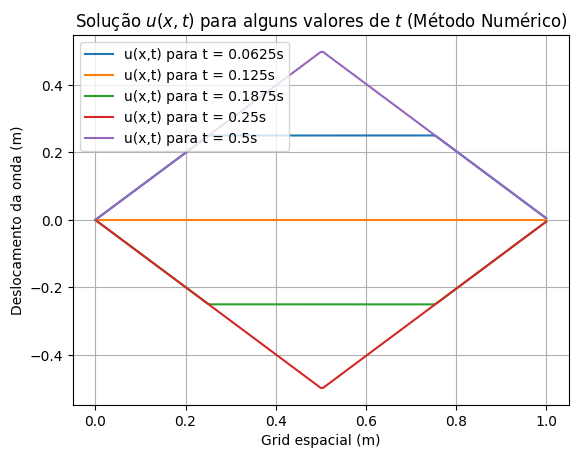

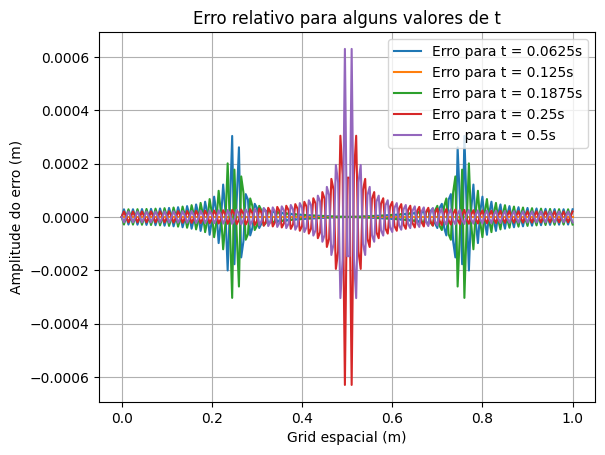

In [23]:
# Iremos utilizar os mesmos padrões para o grid espacial anterior utilizado (ou seja, o dx é o mesmo) e o mesmo array de tempos. 

u_x_0 = np.zeros(N, float)

for i in range(N):
    u_x_0[i] = f(i*dx, L) # Obtendo a condição inicial

alfas = dst(u_x_0) # Obtendo os alfas_k

# Os etas são todos nulo, pois não há velocidade inicial 
etas = np.zeros(len(alfas), float) # todos etas = 0

u_x_t_espectral = [] # Lista para armazenas a solução u(x,t) para cada instante de tempo analisado, dessa vez utilizando o método espectral

for t in tempos:
    u_x_t = np.zeros(N, float) # Cria um grid espacial
    for n in range(N): # Percorre todo o grid espacial
        aux = 0
        for k in range(1,N):
            aux += (alfas[k]*cos(pi*v*k*t/L)-etas[k]*sin(pi*v*k*t/L))*sin(pi*k*n/N)    # Solução do método espectral; o somatório converge para o valor de u(xn,t) no dado ponto xn em análise
        u_x_t[n] = aux/N # Há o fator 1/N ainda na solução

    u_x_t_espectral.append(u_x_t) # Adiciona a solução à lista criada para esse método
    
    plt.plot(xs,u_x_t, label = f'u(x,t) para t = {t}s') # Plota a solução no dado tempo em análise 

u_x_t_espectral = np.array(u_x_t_espectral)

plt.xlabel("Grid espacial (m)")
plt.ylabel("Deslocamento da onda (m)")
plt.title("Solução $u(x,t)$ para alguns valores de $t$ (Método Numérico)")
plt.grid()
plt.legend()
plt.show()

erro =  u_x_t_fourier - u_x_t_espectral

for t in range(len(tempos)):
    plt.plot(xs, erro[t], label = f'Erro para t = {tempos[t]}s')    
plt.xlabel("Grid espacial (m)")
plt.ylabel("Amplitude do erro (m)")
plt.title("Erro relativo para alguns valores de t")
plt.grid()
plt.legend()
plt.show()


Aqui abordarei, adicionarei ao caso anterior uma velocidade inicial não nula para cada ponto da corda, o que consequentemente fará com que os $\eta_n$ deixem de ser nulos.

Considerar a condição inicial:

$$ \frac{\partial u(x,0)}{\partial t} = -1$$

ou seja, todo ponto da corda terá uma velocidade vertical inicial de $-1 m/s$, onde o sinal negativo siginifica que tal velocidade está na direção negativa do eixo vertical. 

Relembrando a relação:

$$ \eta_k = \frac{o_k}{k} (-\frac{L}{\pi v})   $$

onde o coeficiente $o_k$ é o obtido diretamente pela Transformada Direta de Fourier em senos da condição inicial da veloocidade.

Implementando:

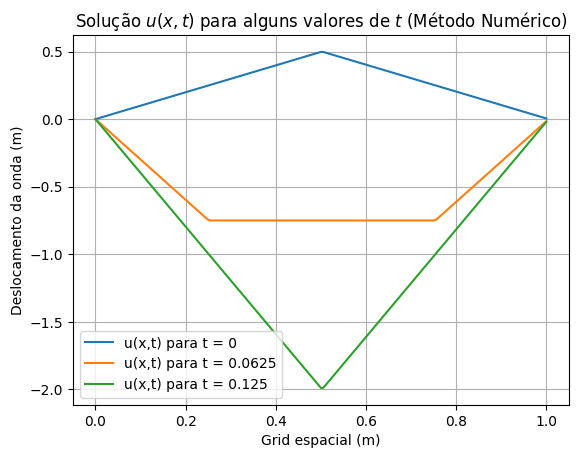

In [34]:
del_u_x_0 = -np.ones(N, float) #

tempos = [0, 0.0625, 0.125] # Definiremos novos tempos de análise, para melhor visualização do resultado

o_k = dst(del_u_x_0)
eta_k_2 = -(L/pi*v)*o_k

for t in tempos:
    u_x_t = np.zeros(N, float)
    for n in range(N):
        aux = 0
        for k in range(1,N):
            eta = eta_k_2[k]/k


            aux += (alfas[k]*cos(pi*v*k*t/L)-eta*sin(pi*v*k*t/L))*sin(pi*k*n/N)    # Solução do método 
        u_x_t[n] = aux/N
    
    plt.plot(xs,u_x_t, label = f'u(x,t) para t = {t}')


plt.xlabel("Grid espacial (m)")
plt.ylabel("Deslocamento da onda (m)")
plt.title("Solução $u(x,t)$ para alguns valores de $t$ (Método Numérico)")
plt.grid()
plt.legend()
plt.show()


## Conclusão

## Apêndice A

#### Determinando os $C_n$

Considerar

$$ C_n = \frac{2}{L} \int_{0}^{L} f(x)\sin{(\frac{n\pi x}{L})} \, dx$$

e

$$ f(x) = 
\begin{cases} 
    x, & \text{se } 0 \leq x < \frac{L}{2} \\
    L-x, & \text{se } \frac{L}{2} \leq x < L 
\end{cases}
$$

O que nos permite manipular os limites da integral de determinação dos $C_n$ e separar em outras 2 integrais:

$$ C_n = \frac{2}{L}[\int_{0}^{\frac{L}{2}} x\sin{(\frac{n\pi x}{L})} \, dx + \int_{\frac{L}{2}}^{L} (L-x)\sin{(\frac{n\pi x}{L})} \, dx]$$

Vamos resolver cada integral dessa separadamente. 

- Começando pela primeira:

$$ \int_{0}^{\frac{L}{2}} x\sin{(\frac{n\pi x}{L})} \, dx $$

Iremos utilizar a tecnica de integração por partes $\int fg^{\prime} = fg - \int f^{\prime}g$, com $f = x$ e $g^{\prime} = sin{(\frac{n\pi x}{L})}$.

Considerando que $f^{\prime} = 1$ e $g = -\frac{\cos{(\frac{n\pi x}{L})}}{\frac{n\pi}{L}}$, obtemos:

$$ \int_{0}^{\frac{L}{2}} x\sin{(\frac{n\pi x}{L})} \, dx = x (-\frac{\cos{(\frac{n\pi x}{L})}}{\frac{n\pi}{L}}\Big|_{0}^{\frac{L}{2}}) - \int_{0}^{\frac{L}{2}} -\frac{\cos{(\frac{n\pi x}{L})}}{\frac{n\pi}{L}} dx$$

$$\int_{0}^{\frac{L}{2}} x\sin{(\frac{n\pi x}{L})} \, dx = -\frac{L}{n\pi} (x\cos{(\frac{n\pi x}{L})}\Big|_{0}^{\frac{L}{2}}) + \frac{L}{n\pi}\int_{0}^{\frac{L}{2}} cos{\frac{n\pi x}{L}} dx$$

$$ \int_{0}^{\frac{L}{2}} x\sin{(\frac{n\pi x}{L})} \, dx = -\frac{L}{n\pi}(\frac{L}{2}\cos{(\frac{n\pi}{L}\frac{L}{2}) - 0}) + \frac{L}{n\pi} (\frac{\sin{(\frac{n\pi x}{L})}}{\frac{n\pi}{L}}\Big|_{0}^{\frac{L}{2}})$$

$$ \int_{0}^{\frac{L}{2}} x\sin{(\frac{n\pi x}{L})} \, dx = -\frac{L^2}{2n\pi}\cos{(\frac{\pi}{2}n)} + \frac{L^2}{n^2\pi^2}(\sin{(\frac{n\pi x}{L})}\Big|_{0}^{\frac{L}{2}})$$

$$ \int_{0}^{\frac{L}{2}} x\sin{(\frac{n\pi x}{L})} \, dx = -\frac{L^2}{2n\pi}\cos{(\frac{\pi}{2}n)} + \frac{L^2}{n^2\pi^2}(\sin{(\frac{n\pi}{L}\frac{L}{2})} - \sin{(\frac{n\pi}{L}0)})$$

$$ \int_{0}^{\frac{L}{2}} x\sin{(\frac{n\pi x}{L})} \, dx = -\frac{L^2}{2n\pi}\cos{(\frac{\pi}{2}n)} + \frac{L^2}{n^2\pi^2}\sin{(\frac{\pi}{2}n)}$$

Essa é a expressão final para nossa primera integral, onde o termo do cosseno e do seno vão ficar alternando entre $1$, $-1$ e $0$.

- Segunda integral:

$$  \int_{\frac{L}{2}}^{L} (L-x)\sin{(\frac{n\pi x}{L})} \, dx = \int_{\frac{L}{2}}^{L} L \sin{(\frac{n\pi x}{L})} \, dx - \int_{\frac{L}{2}}^{L} x\sin{(\frac{n\pi x}{L})} \, dx$$

Para o primeiro termo:

$$ \int_{\frac{L}{2}}^{L} L \sin{(\frac{n\pi x}{L})} \, dx = L\int_{\frac{L}{2}}^{L} \sin{(\frac{n\pi x}{L})} \, dx = L(-\frac{\cos{(\frac{n\pi x}{L})}}{\frac{n\pi}{L}}\Big|_{\frac{L}{2}}^{L}) = -\frac{L^2}{n\pi}(\cos{(\frac{n\pi x}{L})}\Big|_{\frac{L}{2}}^{L})$$

$$ \int_{\frac{L}{2}}^{L} L \sin{(\frac{n\pi x}{L})} \, dx = -\frac{L^2}{n\pi}[cos{(\frac{n\pi}{L}L) - cos{(\frac{n\pi}{L}\frac{L}{2})}}]$$

$$ \int_{\frac{L}{2}}^{L} L \sin{(\frac{n\pi x}{L})} \, dx = -\frac{L^2}{n\pi}[\cos{(n\pi )} - \cos{(\frac{\pi}{2}n)}] $$

$$ \int_{\frac{L}{2}}^{L} L \sin{(\frac{n\pi x}{L})} \, dx = -\frac{L^2}{n\pi}\cos{(n\pi )} + \frac{L^2}{n\pi}\cos{(\frac{\pi}{2}n)}] $$

Para o segundo termo:

$$ \int_{\frac{L}{2}}^{L} x\sin{(\frac{n\pi x}{L})} \, dx$$

Vamos de novo utilizar a integração por partes $\int fg^{\prime} = fg - \int f^{\prime}g$, com $f = x$ e $g^{\prime} = sin{(\frac{n\pi x}{L})}$.

Lembrando que $f^{\prime} = 1$ e $g = -\frac{\cos{(\frac{n\pi x}{L})}}{\frac{n\pi}{L}}$. Assim:

$$ \int_{\frac{L}{2}}^{L} x\sin{(\frac{n\pi x}{L})} \, dx = x (-\frac{\cos{(\frac{n\pi x}{L})}}{\frac{n\pi}{L}}\Big|_{\frac{L}{2}}^{L}) - \int_{\frac{L}{2}}^{L} -\frac{\cos{(\frac{n\pi x}{L})}}{\frac{n\pi}{L}} dx$$

$$ \int_{\frac{L}{2}}^{L} x\sin{(\frac{n\pi x}{L})} \, dx  = -\frac{L}{n\pi} (x\cos{(\frac{n\pi x}{L})}\Big|_{\frac{L}{2}}^{L}) + \frac{L}{n\pi}\int_{\frac{L}{2}}^{L} cos{\frac{n\pi x}{L}} dx$$

$$ \int_{\frac{L}{2}}^{L} x\sin{(\frac{n\pi x}{L})} \, dx = -\frac{L}{n\pi}[L\cos{(\frac{n\pi}{L}L)} - \frac{L}{2}\cos{(\frac{n\pi}{L}\frac{L}{2})}] + \frac{L}{n\pi}(\frac{\sin{(\frac{n\pi x}{L})}}{\frac{n\pi}{L}}\Big|_{\frac{L}{2}}^{L})$$

$$ \int_{\frac{L}{2}}^{L} x\sin{(\frac{n\pi x}{L})} \, dx = -\frac{L}{n\pi}[Lcos{(n\pi)} - \frac{L}{2}\cos{(\frac{\pi}{2}n)}] + \frac{L^2}{n^2\pi^2}(\sin{(\frac{n\pi x}{L})}\Big|_{\frac{L}{2}}^{L})$$

$$ \int_{\frac{L}{2}}^{L} x\sin{(\frac{n\pi x}{L})} \, dx = -\frac{L}{n\pi}[Lcos{(n\pi)} - \frac{L}{2}\cos{(\frac{\pi}{2}n)}] + \frac{L^2}{n^2\pi^2}[\sin{(\frac{n\pi}{L}L)} - \sin{(\frac{n\pi}{L}\frac{L}{2})}]$$

$$ \int_{\frac{L}{2}}^{L} x\sin{(\frac{n\pi x}{L})} \, dx = -\frac{L}{n\pi}[Lcos{(n\pi)} - \frac{L}{2}\cos{(\frac{\pi}{2}n)}] + \frac{L^2}{n^2\pi^2}[\sin{(n\pi)}-\sin{(\frac{\pi}{2}n)}] $$

Aqui o termo $\sin{(n\pi)}$ será sempre igual a 0. Então:

$$ \int_{\frac{L}{2}}^{L} x\sin{(\frac{n\pi x}{L})} \, dx = -\frac{L^2}{n\pi}cos{(n\pi)} + \frac{L^2}{2n\pi}\cos{(\frac{\pi}{2}n)} - \frac{L^2}{n^2\pi^2}\sin{(\frac{\pi}{2}n)} $$

Compactando a segunda integral:

$$ \int_{\frac{L}{2}}^{L} (L-x)\sin{(\frac{n\pi x}{L})} \, dx  = -\frac{L^2}{n\pi}\cos{(n\pi )} + \frac{L^2}{n\pi}\cos{(\frac{\pi}{2}n)} - \Big[ -\frac{L^2}{n\pi}cos{(n\pi)} + \frac{L^2}{2n\pi}\cos{(\frac{\pi}{2}n)} - \frac{L^2}{n^2\pi^2}\sin{(\frac{\pi}{2}n)}\Big]$$

$$ \implies \int_{\frac{L}{2}}^{L} (L-x)\sin{(\frac{n\pi x}{L})} \, dx  = -\frac{L^2}{n\pi}\cos{(n\pi)}+\frac{L^2}{n\pi}\cos{(\frac{\pi}{2}n)} + \Big[\frac{L^2}{n\pi}\cos{(n\pi)}-\frac{L^2}{2n\pi}\cos{(\frac{\pi}{2}n)} + \frac{L^2}{n^2\pi^2}\sin{(\frac{\pi}{2}n)}\Big]$$

$$ \implies \int_{\frac{L}{2}}^{L} (L-x)\sin{(\frac{n\pi x}{L})} \, dx  = \frac{L^2}{2n\pi}\cos{(\frac{\pi}{2}n)} + \frac{L^2}{n^2\pi^2}\sin{(\frac{\pi}{2}n)}$$

Assim, a expressão final será:

$$ C_n = \frac{2}{L}[\int_{0}^{\frac{L}{2}} x\sin{(\frac{n\pi x}{L})} \, dx + \int_{\frac{L}{2}}^{L} (L-x)\sin{(\frac{n\pi x}{L})} \, dx]$$ 

$$ C_n = \frac{2}{L}\Big[-\frac{L^2}{2n\pi}\cos{(\frac{\pi}{2}n)} + \frac{L^2}{n^2\pi^2}\sin{(\frac{\pi}{2}n)} + [\frac{L^2}{2n\pi}\cos{(\frac{\pi}{2}n)} + \frac{L^2}{n^2\pi^2}\sin{(\frac{\pi}{2}n)}]\Big]$$

$$ C_n = \frac{2}{L}\Big[\frac{2L^2}{n^2\pi^2}\sin{(\frac{\pi}{2}n)}     \Big]$$

$$C_n = \frac{4L}{n^2\pi^2}\sin{(\frac{\pi}{2}n)}$$

Os primeiros termos da sequência serão:

$$ C_1 = \frac{4L}{1^2\pi^2}\sin{(\frac{\pi}{2}1)} = \frac{4L}{1^2\pi^2}$$

$$ C_2 = \frac{4L}{2^2\pi^2}\sin{(\frac{\pi}{2}2)} = 0 $$

$$ C_3 = \frac{4L}{3^2\pi^2}\sin{(\frac{\pi}{2}3)} = -\frac{4L}{3^2\pi^2}$$

$$ C_4 = \frac{4L}{4^2\pi^2}\sin{(\frac{\pi}{2}4)} = 0$$

Pelo padrão, percebemos que a sequência será alternada nos $n$ ímpares e nula para $n$ par. Assim:

$$ \therefore \boxed{C_n  = 
\begin{cases} 
    \frac{4}{n^2\pi^2} (-1)^{\frac{n-1}{2}}, & \text{se n for ímpar} \\
    0, & \text{se n for par}  
\end{cases}}$$

### *Referências* 

[1] *Mark Newman - Computational Physics (2013, University of Michigan)*

[2] William E. Boyce; Richard C. DiPrima. Equações Diferenciais Elementares e Problemas de Valores de Contorno. 8. Ed. LTC, 2012.